In [1]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# 

In [2]:
import utils.load_grid as lg
from utils.load_cmaps import *

In [3]:
pgrid_dir = "data/shared/jgr_2"
cases = lg.get_cases(pgrid_dir)

In [4]:
# Collect netcdf files
stts = lg.get_statuses(pgrid_dir)
# endn = lg.load_netcdfs_end(cases)

# Configuration variables
cvars = lg.load_cvars(cases)
ncases = len(cases)

# Helpfiles
helps, hvars = lg.load_helpfiles(cases)

print("Done")

Helpfiles: 100%|██████████| 256/256 [00:08<00:00, 31.07it/s]


Done


In [11]:
def plot_var_vs_time(y_key, y_lbl, default_col='black', logx=False, logy=True, scatter=False, ylims=None):

    y_key = str(y_key).strip()
    y_key_lower = y_key.lower()

    # options
    lw = 1.0
    al = 0.2
    col = default_col

    fig,ax = plt.subplots(1,1, figsize=(7,4))

    # for all cases
    max_time = 1.0
    show_legend = False
    for i in range(ncases):

        x_arr = np.array(helps[i]["Time"]) / 1.0e6
        max_time = max(max_time, np.amax(x_arr))

        # if not np.any(np.array(helps[i]["F_atm"]) < 1.0e-6):
        #     continue


        # handle key
        if y_key_lower in ["bar", "vmr"]:
            show_legend = True

            for v in lg.volatile_species:
                if y_key_lower == "bar":
                    key = v+"_atm_bar"
                elif y_key_lower == "vmr":
                    key = v+"_mr"
                if i == 0:
                    lbl = v 
                else:
                    lbl = None
                y_arr = np.array(helps[i][key])
                col   = lg.volatile_colors[v]

                if np.all(y_arr < 1.0e-30):
                    continue
                if scatter:
                    ax.scatter(x_arr, y_arr, c=col, label=lbl, alpha=al, s=1)
                else:
                    ax.plot(x_arr, y_arr, c=col, label=lbl, alpha=al, lw=lw)

        else:
            y_arr = np.array(helps[i][y_key])
            if scatter:
                ax.scatter(x_arr, y_arr, c=col, alpha=al, s=1)
            else:
                ax.plot(x_arr, y_arr, c=col, alpha=al, lw=lw)
            

    # configure plot
    ax.set_xlabel("Time [Myr]")
    ax.set_xlim(1.0e-3, max_time)
    if logx:
        ax.set_xscale("log")

    ax.set_ylabel(y_lbl)
    if logy:
        ax.set_yscale("log")
    if y_key == "vmr":
        ax.set_ylim(1e-7, 1.1)

    if not (ylims == None):
        ax.set_ylim(ylims[0], ylims[1])

    # final things
    fig.tight_layout()
    if show_legend:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()
    


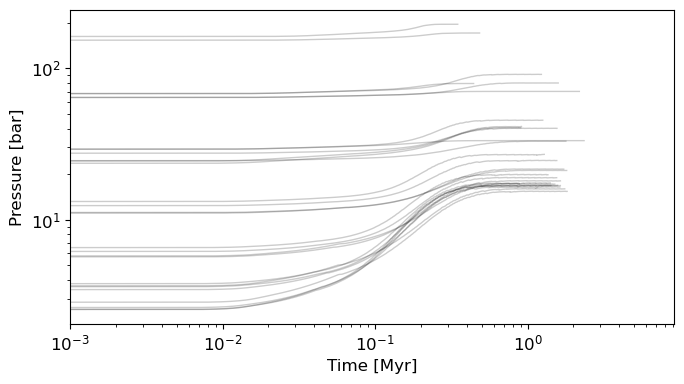

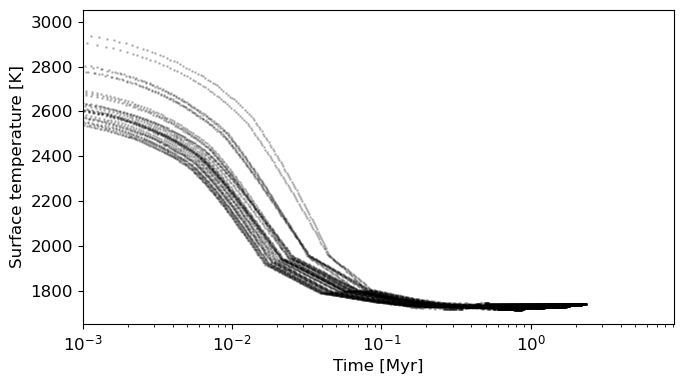

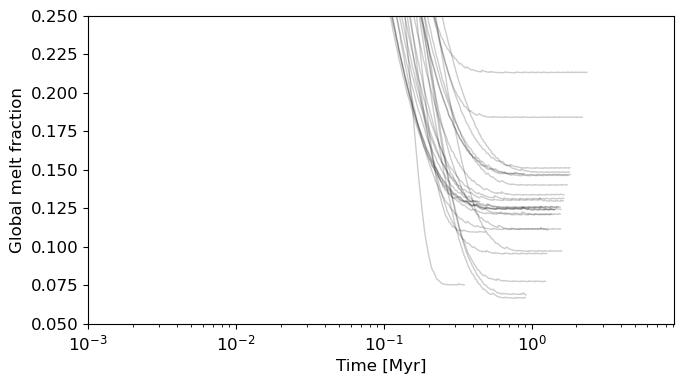

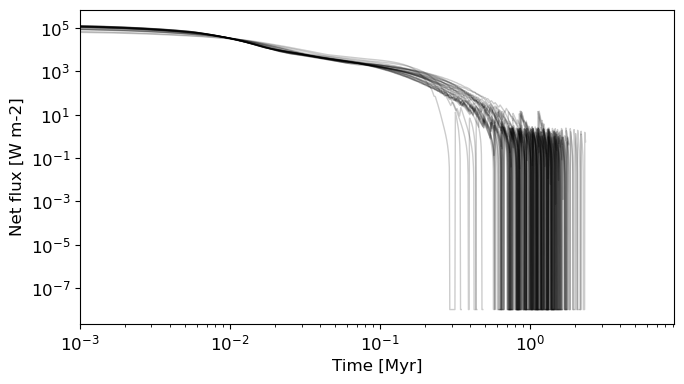

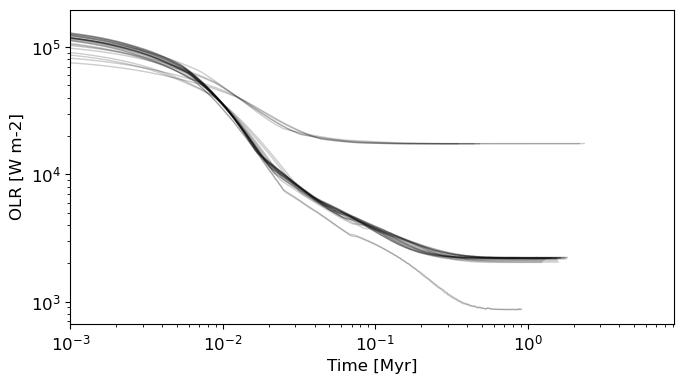

In [13]:
plot_var_vs_time("P_surf", "Pressure [bar]", logx=True)
plot_var_vs_time("T_surf", "Surface temperature [K]", logx=True, logy=False, scatter=True)
plot_var_vs_time("Phi_global", "Global melt fraction", logx=True, logy=False, ylims=(0.05,0.25))
plot_var_vs_time("F_atm", "Net flux [W m-2]", logx=True, logy=True)
plot_var_vs_time("F_olr", "OLR [W m-2]", logx=True, logy=True)